In [1]:
import numpy as np
import matplotlib.pyplot as plt




In [2]:
def get_a(deg_true):
    
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y




In [3]:
def least_squares_est(X,target_vector):
    if X.shape[0]<= X.shape[1]:
        raise ValueError('number of rows in design matrix less than number of columns')
    else:
        return(np.linalg.inv(X.T@X)@X.T@target_vector)
     
         

In [4]:
def empirical_risk(X, target_vector, coefficients):
    total_risk = sum((target_vector - X@coefficients)**2)
    return(total_risk/len(target_vector))

In [10]:
#Problem 9, estimate b hat from x_train, y_train
a = get_a(2)

x_train,y_train= draw_sample(2,a,10)
x_test, y_test = draw_sample(2,a,1000)
X_train_mat = get_design_mat(x_train,5)
X_test_mat = get_design_mat(x_test,5)

In [11]:
b = least_squares_est(X_train_mat, y_train)

In [12]:
empirical_risk(X_test_mat,y_test,b)

2.8435421653379964e-19

In [28]:
def true_func_input (x, degree):
    data = []
    for i in range(degree+1):
        data.append(x**i)
    return(np.array(data))

x = np.linspace(0,1, 1000)

true_func = true_func_input(x,2).T@a
y_pred = x_train_mat @ b

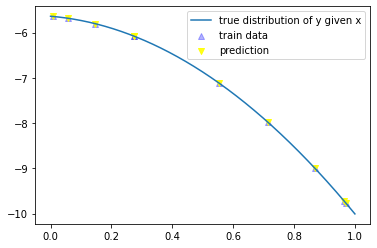

In [37]:
plt.scatter(x_train,y_train, color = 'blue', alpha = .3, marker = '^', label ='train data')
plt.scatter(x_train,y_pred, color = 'yellow', alpha = .9, marker = 'v', label = 'prediction')
plt.plot(x, true_func, linestyle ='-', label = 'true distribution of y given x')
plt.legend()
#notice the overlapping between prediction and train data

In [21]:
#keeping y train and y_test the same, how well would our
#polynomial of degree i fit model a polynomial of degree 5
for i in range(9):
    x_train_mat = get_design_mat(x_train,i)
    x_test_mat = get_design_mat(x_test,i)
    b = least_squares_est(x_train_mat, y_train)
    message = 'The empirical risk of Polyonimal ' + str(i) +' is '
    emp_risk = empirical_risk(x_test_mat,y_test,b)
    print(message + str(round(emp_risk,20)))


The empirical risk of Polyonimal 0 is 1.6040705017375476
The empirical risk of Polyonimal 1 is 0.11524484601756173
The empirical risk of Polyonimal 2 is 0.0
The empirical risk of Polyonimal 3 is 0.0
The empirical risk of Polyonimal 4 is 0.0
The empirical risk of Polyonimal 5 is 2.8e-19
The empirical risk of Polyonimal 6 is 1.7373e-16
The empirical risk of Polyonimal 7 is 3.09549377e-12
The empirical risk of Polyonimal 8 is 3.73908315633e-09


In [57]:
#create lists to iterate over for d and n
deg_list = [2,5,10]
n_list = [100,200,300,400,500,600,700,800,900]


#create blank lists to store input vectors
x_train_list =[]
y_train_list = []
y_test_list = []

n_test = 1000

#create blank lists to store input matricies
x_train_mat_list = []
x_test_mat_list = []

#create blank list to store coefficients
coef_list = []

#create test sample we'll be using for the training and testing error
x_train,y_train= draw_sample_with_noise(2,a,1000)
x_test, y_test = draw_sample_with_noise(2,a,n_test)

#create blank list to store training and generalization error

training_error_dict = {}
test_error_dict = {}

for i in range(len(deg_list)):
    #determine the polynomial of the function and the coefficients of g(x)
    deg = deg_list[i]
    
    #create a list that will be re-initialized for each degree we change
    training_error_list = []
    test_error_list = []
    
    

    for j in range(len(n_list)):
        #determine the sample size
        n = n_list[j]
        
        #initialize x_train, y_train, x_test, y_test
 



        #create input matricies
        
        x_train_mat = get_design_mat(x_train[0:n],deg)
        x_test_mat = get_design_mat(x_test,deg)
        
        #append them to matrix list
        x_train_mat_list.append(x_train_mat)
        x_test_mat_list.append(x_test_mat)
        y_train_input =  y_train[0:n]
        #run regression on x_train_mat and y
        b = least_squares_est(x_train_mat, y_train_input)
        

        
        #append coefficients to coef_list
        coef_list.append(b)
        
        #calculate training and testing risk, printing it
        train_emp_risk = empirical_risk(x_train_mat,y_train_input,b)
        
        print('The training empirical risk of Polyonimal ' + str(deg) +' with training sample size '+ str(n) + ' is ' + str(round(train_emp_risk,3)))
        training_error_list.append(train_emp_risk)
        
        print('\n')
        test_emp_risk = empirical_risk(x_test_mat,y_test,b)
        print('The testing empirical risk of Polyonimal ' + str(deg) +' with sample size ' + str(n) + ' is ' + str(round(test_emp_risk,3)))
        print('\n')
        test_error_list.append(test_emp_risk)
        if j == len(n_list)- 1:
            training_error_dict[deg] = training_error_list
            test_error_dict[deg] = test_error_list
    

The training empirical risk of Polyonimal 2 with training sample size 100 is 0.859


The testing empirical risk of Polyonimal 2 with sample size 100 is 2906.189


The training empirical risk of Polyonimal 2 with training sample size 200 is 0.983


The testing empirical risk of Polyonimal 2 with sample size 200 is 6.309


The training empirical risk of Polyonimal 2 with training sample size 300 is 0.956


The testing empirical risk of Polyonimal 2 with sample size 300 is 23.292


The training empirical risk of Polyonimal 2 with training sample size 400 is 0.917


The testing empirical risk of Polyonimal 2 with sample size 400 is 5.413


The training empirical risk of Polyonimal 2 with training sample size 500 is 0.952


The testing empirical risk of Polyonimal 2 with sample size 500 is 1.228


The training empirical risk of Polyonimal 2 with training sample size 600 is 0.951


The testing empirical risk of Polyonimal 2 with sample size 600 is 1.098


The training empirical risk of Polyo

In [215]:
x= 0.0010561112612781365
print(x**2)

1.1153709961984962e-06


In [205]:
print(x_test[0],y_test[0])

0.0010561112612781365 -5.682557636032859


In [221]:
x_test_mat_list[8].shape

(1000, 3)

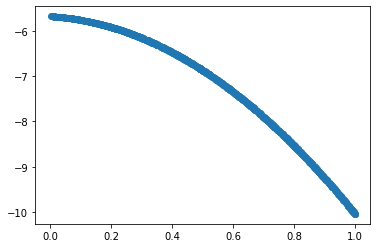

In [225]:
plt.scatter(x_test,x_test_mat_list[8]@coef_list[8])

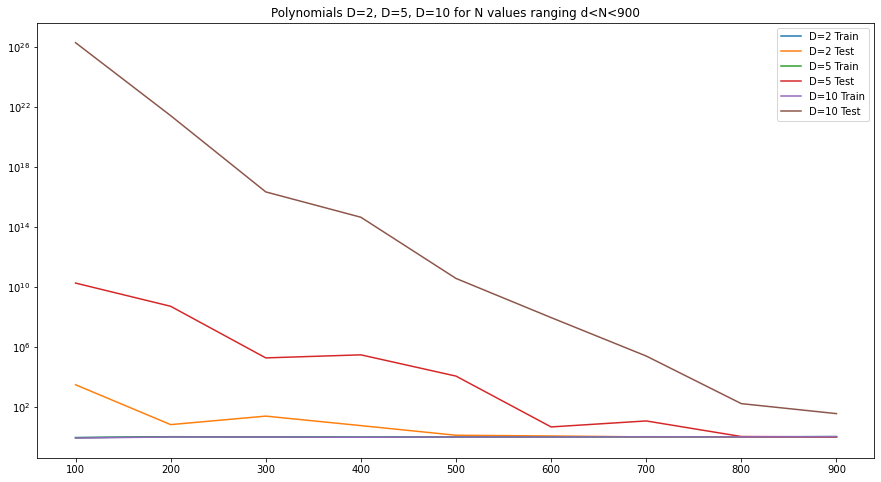

In [143]:
plt.figure(figsize=(15,8))
plt.plot(n_list, training_error_dict[2])

plt.plot(n_list, test_error_dict[2])
plt.plot(n_list, training_error_dict[5])
plt.plot(n_list, test_error_dict[5])
plt.plot(n_list, training_error_dict[10])
plt.plot(n_list, test_error_dict[10])
#plt.plot(n[6:], train_error_arr_5)
#plt.plot(n[6:], test_error_arr_5)
#plt.plot(n[11:], train_error_arr_10)
#plt.plot(n[11:], test_error_arr_10)
plt.legend(labels=['D=2 Train','D=2 Test','D=5 Train', 'D=5 Test', 'D=10 Train','D=10 Test'])
plt.title("Polynomials D=2, D=5, D=10 for N values ranging d<N<900")
plt.yscale('log')


In [ ]:
#plotting our different polynomials approximation of the true distribution with noise compared to our various
#polynomial fits

In [127]:
x_train_mat_list[4].shape

(500, 3)

In [115]:
26//9

2

In [103]:
len(coef_list[9])

3

In [183]:
def create_plot_train(n, true_a):
    plt.figure(figsize=(15,8))
    n_dict = {100:0, 200:1, 300:2, 400:3, 500:4, 600:5, 700:6, 800:7, 900:8}
    #plot training data
    plt.scatter(x_train[0:n], y_train[0:n], label = 'training data')
    #plot true_function
    true_y = x_train_mat_list[n_dict[n]]@a
    #plot different polynomial functions
    y_pred_list =[]
    for i in range(len(x_train_mat_list)//9):
        y_pred = x_train_mat_list[(n_dict[n]+9*i)] @ coef_list[(n_dict[n]+9*i)]
        y_pred_list.append(y_pred)
        plt.plot(x_train[0:n],y_pred_list[i], label = 'estimation of true y using polynomial of degree '+ str(deg_list[i]))



    plt.plot(x_train[0:n], true_y, label= 'true x,y joint distribution')
    plt.legend()
    plt.show()
    






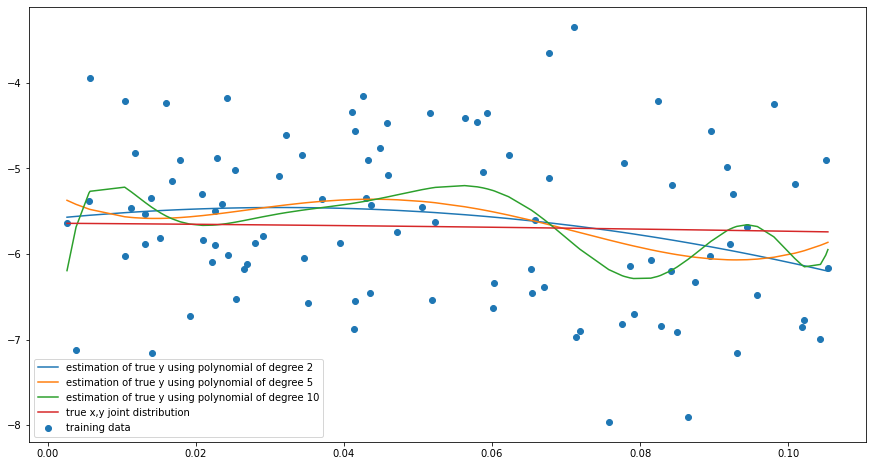

In [185]:
create_plot_train(100, a)

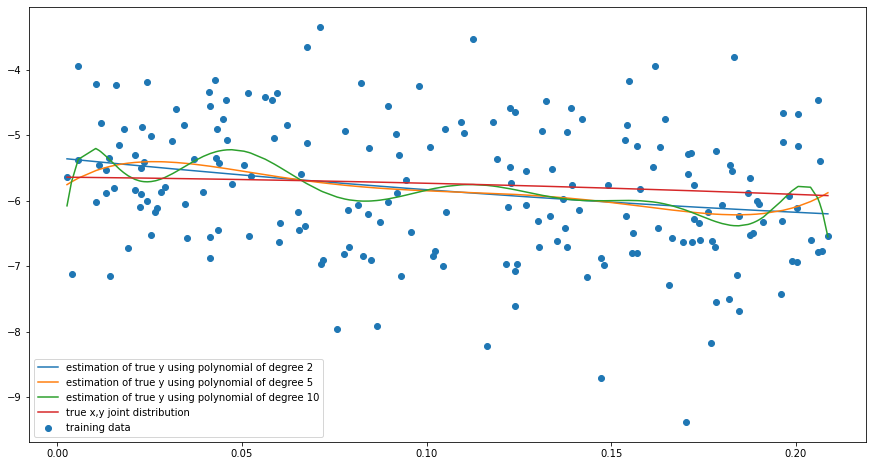

In [135]:
create_plot(200, a)

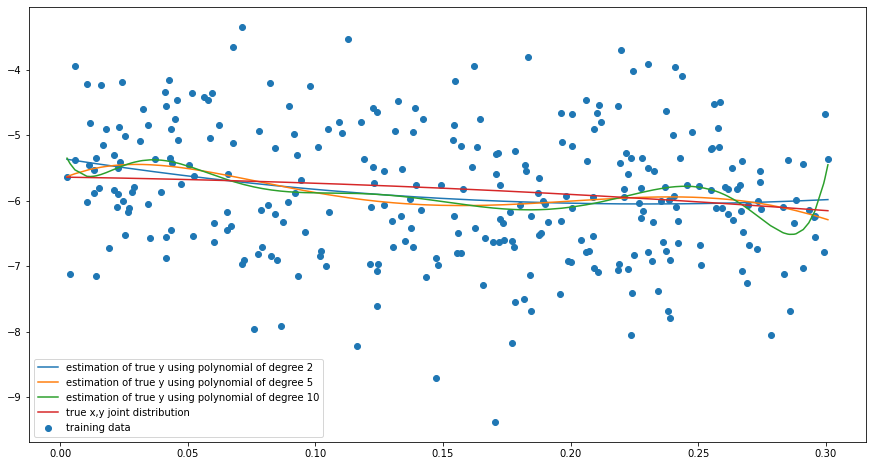

In [136]:
create_plot(300, a)

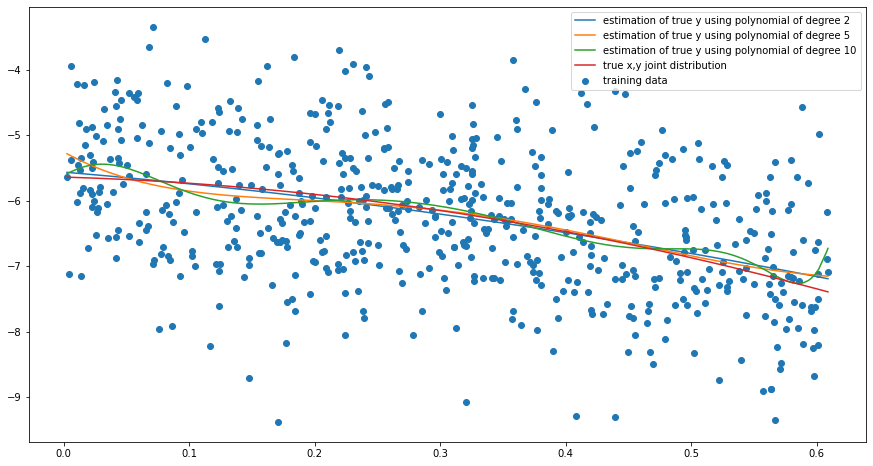

In [137]:
create_plot(600, a)

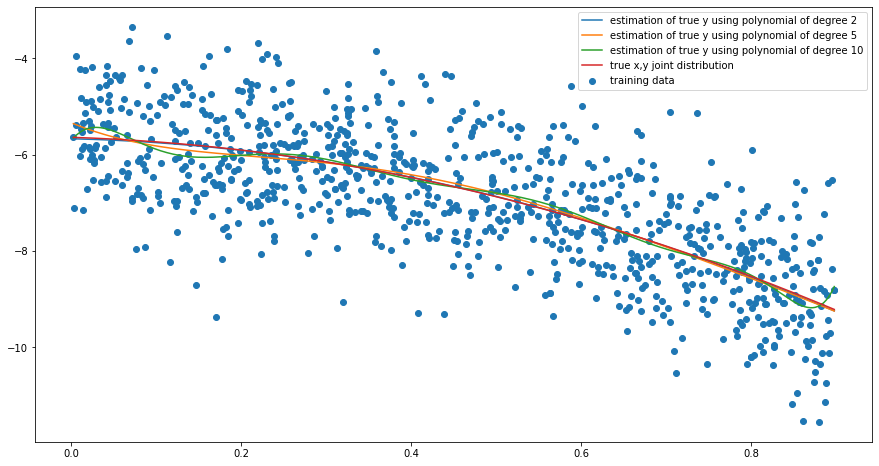

In [139]:
create_plot(900, a)

In [ ]:
#problem 12, find an empirical estimator of the estimation error for values of n and d as a function of n

#so total error = estimation error + approximation error + optimization error 

#for a given n, how does changing the d impact error -> approximatoin error 
#for a given d, how does changing n impact error  -> estimation error



In [175]:
x_test_mat_list[18].shape

(1000, 11)

In [187]:
a

array([-5.64058122, -0.56014389, -3.80616464])

In [192]:
n_dict = {100:0, 200:1, 300:2, 400:3, 500:4, 600:5, 700:6, 800:7, 900:8}


coef_list[(n_dict[800]+18)]

array([-5.62951813e+00,  1.15543888e+01, -2.11906806e+02, -2.14582472e+02,
        1.93171664e+04, -1.38671632e+05,  4.73592210e+05, -9.08579682e+05,
        1.00195900e+06, -5.93733684e+05,  1.46620505e+05])

In [203]:
a

array([-5.64058122, -0.56014389, -3.80616464])

In [204]:
coef_list[7]

array([-5.65644851, -0.54003911, -3.77214797])

In [200]:
print(n_dict[800]+9)

16


In [245]:
def create_plot_test(n, true_a):
    plt.figure(figsize=(15,8))
    n_dict = {100:0, 200:1, 300:2, 400:3, 500:4, 600:5, 700:6, 800:7, 900:8}
    #plot training data
    plt.scatter(x_test, y_test, label = 'test data')
    #plot true_function
    true_y = x_test_mat_list[n_dict[n]]@a
    #plot different polynomial functions
    y_pred_list =[]
    color_list = ['black', 'red', 'orange']
    for i in range(len(x_test_mat_list)//9):
        y_pred = x_test_mat_list[(n_dict[n]+9*i)] @ coef_list[(n_dict[n]+9*i)]
        y_pred_list.append(y_pred)
        plt.plot(x_test,y_pred_list[i], color = color_list[i], label = 'estimation of true y using polynomial of degree '+ str(deg_list[i]))
    


    plt.plot(x_test, true_y, color = 'yellow', linestyle = '-', label= 'true x,y joint distribution')
    plt.legend()

    plt.show()
    
    
def create_plot_test_no_deg_10(n, true_a):
    plt.figure(figsize=(15,8))
    n_dict = {100:0, 200:1, 300:2, 400:3, 500:4, 600:5, 700:6, 800:7, 900:8}
    #plot training data
    plt.scatter(x_test, y_test, label = 'test data')
    #plot true_function
    true_y = x_test_mat_list[n_dict[n]]@a
    #plot different polynomial functions
    y_pred_list =[]
    color_list = ['black', 'red']
    for i in range(len(x_test_mat_list)//9-1):
        y_pred = x_test_mat_list[(n_dict[n]+9*i)] @ coef_list[(n_dict[n]+9*i)]
        y_pred_list.append(y_pred)
        plt.plot(x_test,y_pred_list[i], color = color_list[i], label = 'estimation of true y using polynomial of degree '+ str(deg_list[i]))
    


    plt.plot(x_test, true_y, color = 'yellow', linestyle = '-', label= 'true x,y joint distribution')
    plt.legend()

    plt.show()
    
    







    
    







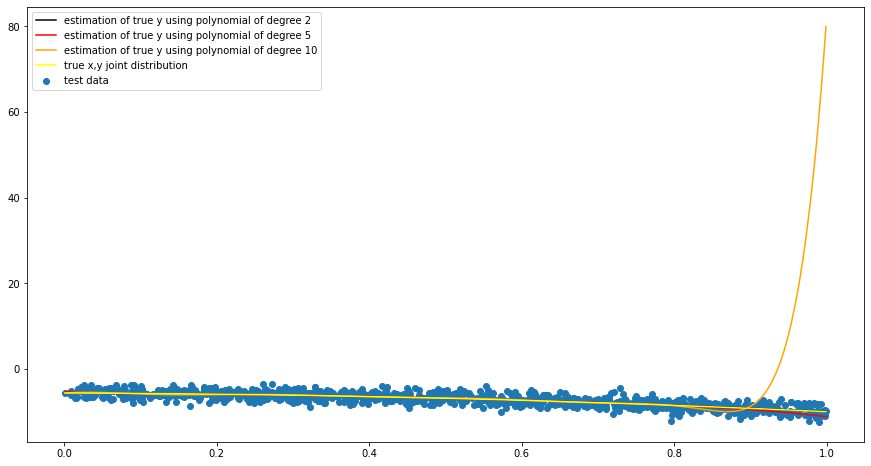

In [242]:
create_plot_test(800,a)

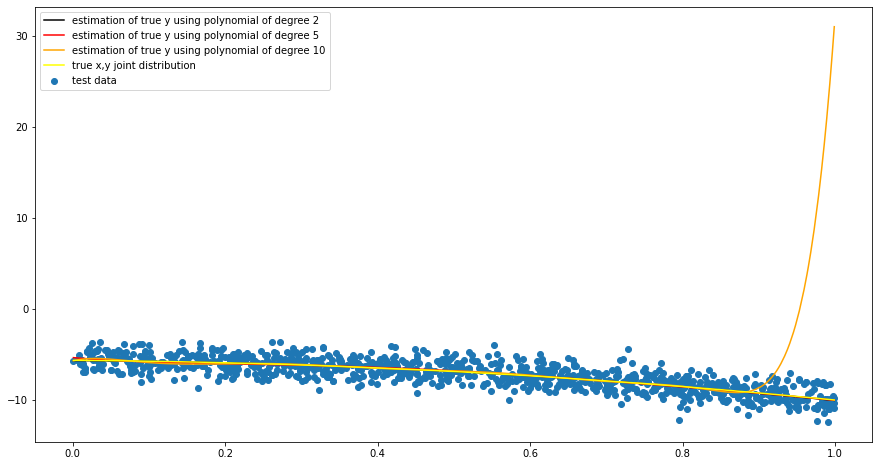

In [243]:
create_plot_test(900,a)

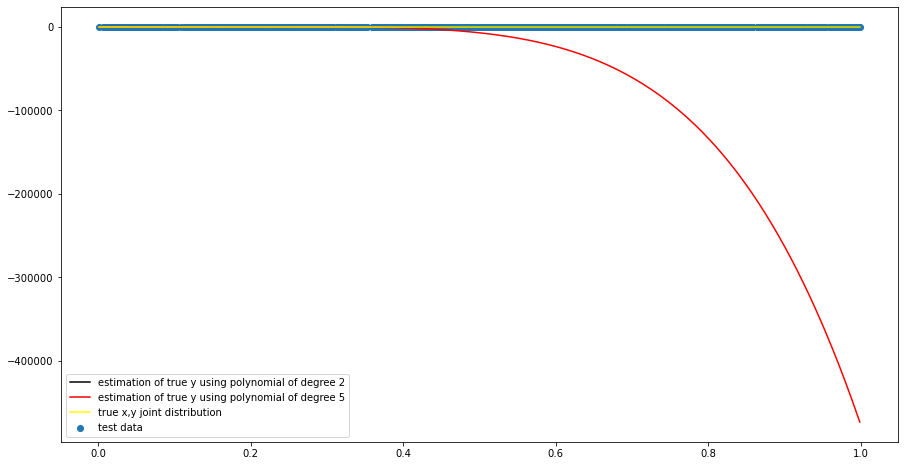

In [247]:
create_plot_test_no_deg_10(100,a)

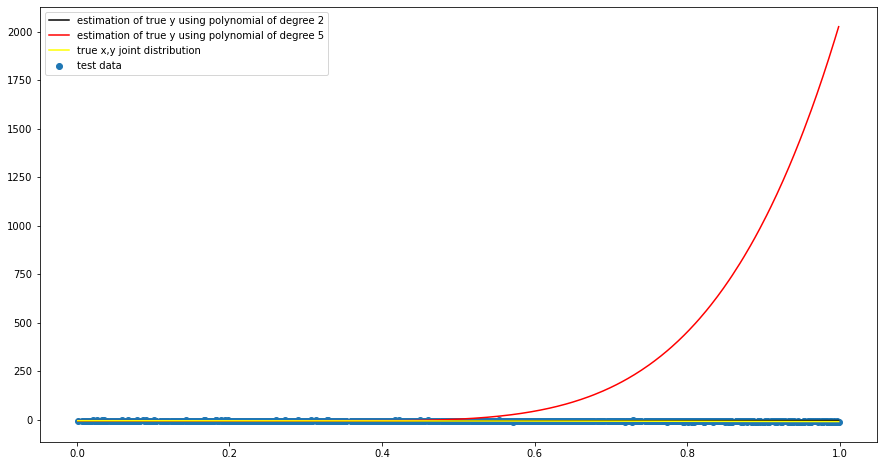

In [248]:
create_plot_test_no_deg_10(400,a)

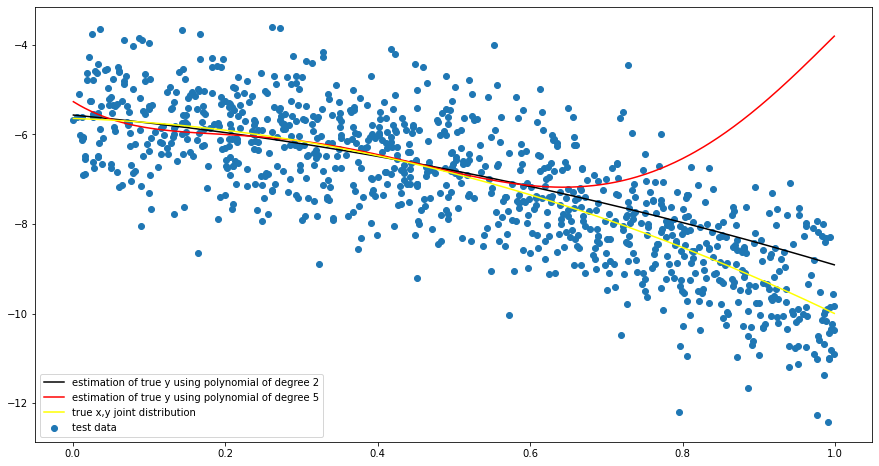

In [251]:
create_plot_test_no_deg_10(600,a)